In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv("Desktop/Train_UWu5bXk.csv")
test = pd.read_csv("Desktop/Test_u94Q5KV.csv")

In [3]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Visualization

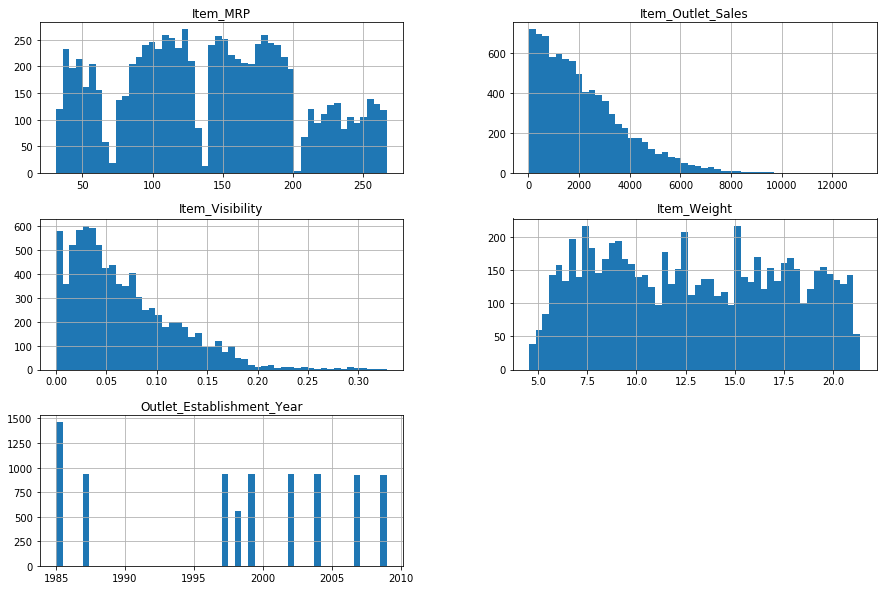

In [6]:
train.hist(bins=50, figsize=(15, 10))
plt.show()

Here Item_Visibility of some Items is zero which is not possible, so we'll treat it as a missing value.

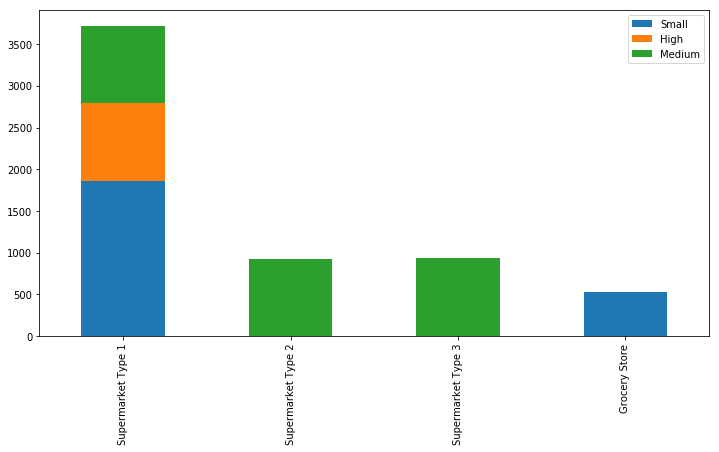

In [7]:
sm1_outletSize = train['Outlet_Size'][train['Outlet_Type']=='Supermarket Type1'].value_counts()
sm2_outletSize = train['Outlet_Size'][train['Outlet_Type']=='Supermarket Type2'].value_counts()
sm3_outletSize = train['Outlet_Size'][train['Outlet_Type']=='Supermarket Type3'].value_counts()
gs_outletSize = train[train['Outlet_Type']=='Grocery Store']['Outlet_Size'].value_counts()

df_type_size = pd.DataFrame([sm1_outletSize, sm2_outletSize, sm3_outletSize, gs_outletSize])
df_type_size.index = ['Supermarket Type 1', 'Supermarket Type 2', 'Supermarket Type 3', 'Grocery Store']
df_type_size.plot(kind='bar',stacked=True, figsize=(12,6))
plt.show()

Here we can see that Supermarket Type 2 and Type 3 have Outlet_Size *Medium*.

And all Grocery Store have *Small* Outlet_Size.

Most Supermarket type 1 are also mostly *small*.

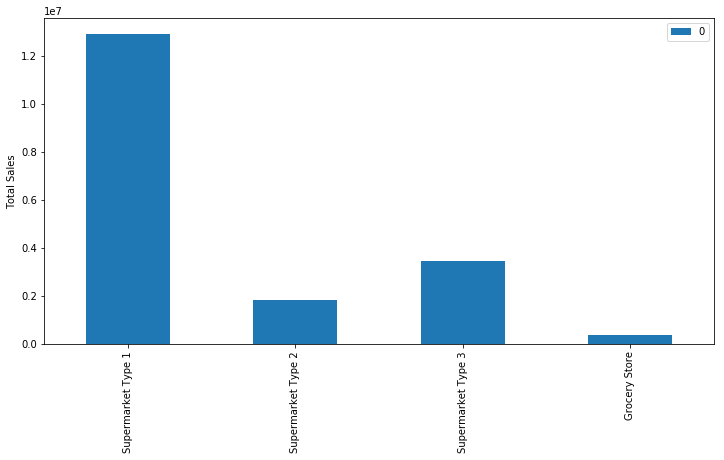

In [8]:
sm1_sales = train['Item_Outlet_Sales'][train['Outlet_Type']=='Supermarket Type1'].sum()
sm2_sales = train['Item_Outlet_Sales'][train['Outlet_Type']=='Supermarket Type2'].sum()
sm3_sales = train['Item_Outlet_Sales'][train['Outlet_Type']=='Supermarket Type3'].sum()
gs_sales = train['Item_Outlet_Sales'][train['Outlet_Type']=='Grocery Store'].sum()

df_store_sales = pd.DataFrame([sm1_sales, sm2_sales, sm3_sales, gs_sales])
df_store_sales.index = ['Supermarket Type 1', 'Supermarket Type 2', 'Supermarket Type 3', 'Grocery Store']
df_store_sales.plot(kind='bar', figsize=(12,6))
plt.ylabel("Total Sales")
plt.show()

We see that Supermarket Type 1 contribute to majority of the Sales

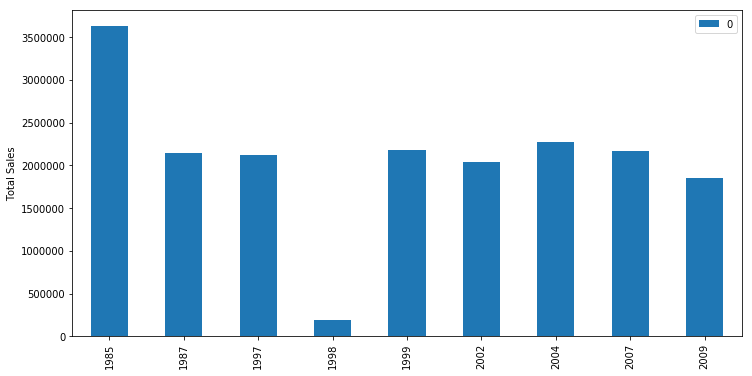

In [9]:
sales_1985 = train['Item_Outlet_Sales'][train['Outlet_Establishment_Year']==1985].sum()
sales_1987 = train['Item_Outlet_Sales'][train['Outlet_Establishment_Year']==1987].sum()
sales_1997 = train['Item_Outlet_Sales'][train['Outlet_Establishment_Year']==1997].sum()
sales_1998 = train['Item_Outlet_Sales'][train['Outlet_Establishment_Year']==1998].sum()
sales_1999 = train['Item_Outlet_Sales'][train['Outlet_Establishment_Year']==1999].sum()
sales_2002 = train['Item_Outlet_Sales'][train['Outlet_Establishment_Year']==2002].sum()
sales_2004 = train['Item_Outlet_Sales'][train['Outlet_Establishment_Year']==2004].sum()
sales_2007 = train['Item_Outlet_Sales'][train['Outlet_Establishment_Year']==2007].sum()
sales_2009 = train['Item_Outlet_Sales'][train['Outlet_Establishment_Year']==2009].sum()

df_store_sales = pd.DataFrame([sales_1985, sales_1987, sales_1997, sales_1998, sales_1999, sales_2002, sales_2004, 
                              sales_2007, sales_2009])
df_store_sales.index = ['1985', '1987', '1997', '1998', '1999', '2002', '2004', '2007', '2009']
df_store_sales.plot(kind='bar', figsize=(12,6))
plt.ylabel("Total Sales")
plt.show()

Outlets established in 1985 contribute mainly in the Total sales and 1998 established has the least contibution.

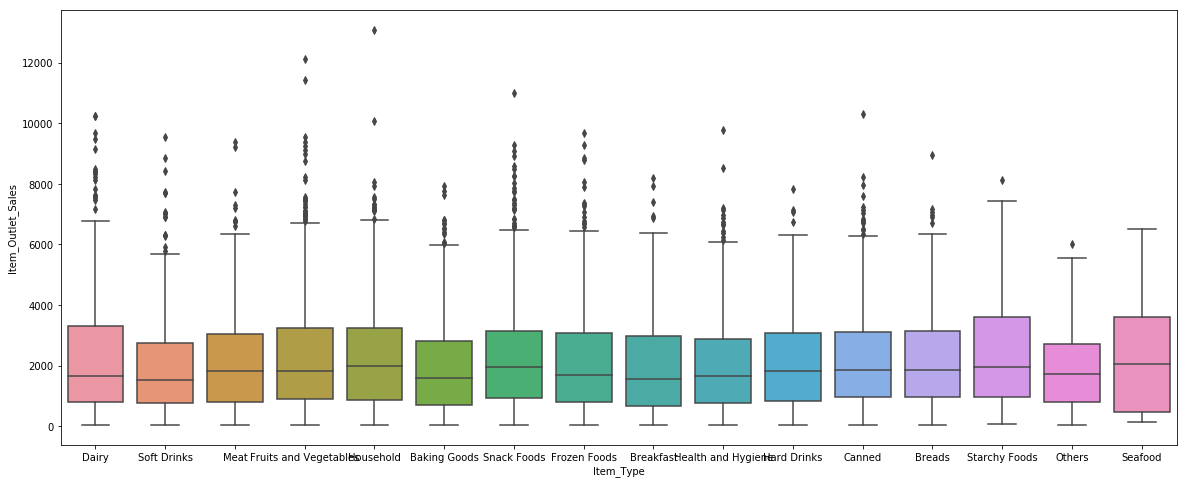

In [10]:
plt.figure(figsize=(20,8))
sns.boxplot(x = train['Item_Type'], y = train['Item_Outlet_Sales'])
plt.show()

The black dots are the outliers and the line inside the box is the median of each Item Type.

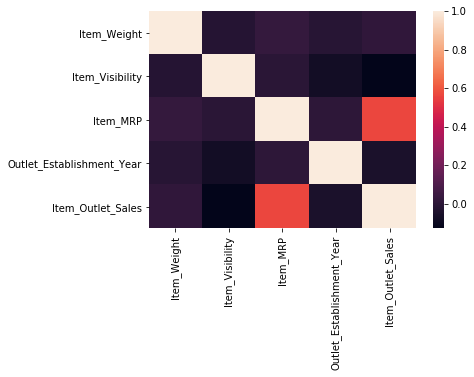

In [11]:
sns.heatmap(train.corr())
plt.show()

More the lighter is the color in each square, higher is the correlation between the attributes. So Item_MRP is an important attribute in deciding Item_Outlet_Sales as compared to other features.

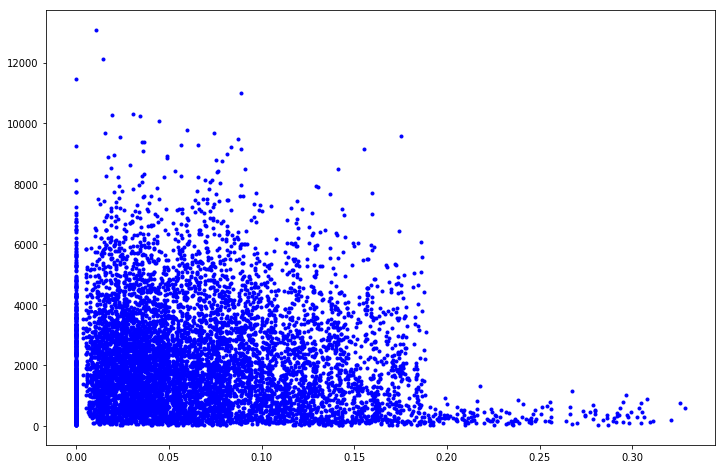

In [12]:
plt.figure(figsize=(12,8))
plt.plot(train['Item_Visibility'], train['Item_Outlet_Sales'], 'b.')
plt.show()

Items with Visibility less than 0.20 contribute majorly to the sales

# Filling Missing Values

In [13]:
# Combining the Train and Test Set

train_labels = train['Item_Outlet_Sales']

train.drop('Item_Outlet_Sales', axis=1, inplace=True)

full_data = pd.concat([train, test])

In [14]:
full_data.shape

(14204, 11)

In [15]:
full_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Item Weight

We have 2439 missing values in Item_Weight

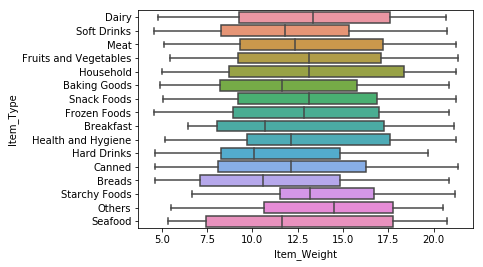

In [16]:
sns.boxplot(x = train['Item_Weight'], y = train['Item_Type'])
plt.show()

In [17]:
train.groupby('Item_Type')['Item_Weight'].median()

Item_Type
Baking Goods             11.650
Breads                   10.600
Breakfast                10.695
Canned                   12.150
Dairy                    13.350
Frozen Foods             12.850
Fruits and Vegetables    13.100
Hard Drinks              10.100
Health and Hygiene       12.150
Household                13.150
Meat                     12.350
Others                   14.500
Seafood                  11.650
Snack Foods              13.150
Soft Drinks              11.800
Starchy Foods            13.175
Name: Item_Weight, dtype: float64

In [18]:
full_data['Item_Weight'].fillna(train.groupby('Item_Type')['Item_Weight'].transform('median'), inplace=True)

In [19]:
full_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

No more missing values in Item_Weight

### Outlet_Size 

Outlet_Size has 4016 missing values

In [20]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

Maximum Outlets have size Medium, so we will fill missing values with it

In [21]:
full_data['Outlet_Size'] = full_data['Outlet_Size'].fillna(train['Outlet_Size'].mode().iloc[0])

In [22]:
full_data['Outlet_Size'].isnull().sum()

0

### Item_Visibility

In [23]:
(full_data['Item_Visibility'] == 0).value_counts()

False    13325
True       879
Name: Item_Visibility, dtype: int64

526 Items have Item_Visibility equal to 0.

We will fill it with the median.

In [24]:
full_data['Item_Visibility'][full_data['Item_Visibility'] == 0] = train['Item_Visibility'].median()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
(full_data['Item_Visibility'] == 0).value_counts()

False    14204
Name: Item_Visibility, dtype: int64

In [26]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We have no more missing values.

# Data Cleaning

In [27]:
full_data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Fat_Content has mismatched factor levels.

In [28]:
full_data['Item_Fat_Content'][full_data['Item_Fat_Content'] == 'LF'] = 'Low Fat'
full_data['Item_Fat_Content'][full_data['Item_Fat_Content'] == 'low fat'] = 'Low Fat'
full_data['Item_Fat_Content'][full_data['Item_Fat_Content'] == 'reg'] = 'Regular'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
full_data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [30]:
full_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


# Feature Engineering

In [31]:
#Adding Item_Outlet_Sales back to train

train['Item_Outlet_Sales'] = train_labels

In [32]:
corr_matrix = train.corr()

corr_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [33]:
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

we can see that Item_MRP and Item_Outlet_Sales have strong correlation. So Item_MRP is an important factor in deciding Item_Outlet_Sales. 

In [34]:
full_data['MRP_Weight'] = full_data['Item_MRP'] / full_data['Item_Weight']

In [35]:
# Extracting the first two letters of Item_Identifier

full_data['Item_Id_Type'] = full_data['Item_Identifier'].str.extract('([A-Z].)', expand=False)

In [36]:
full_data.drop('Item_Identifier', axis=1, inplace=True)

In [37]:
full_data['outlet_year'] = 2020 - full_data['Outlet_Establishment_Year']

In [38]:
full_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,MRP_Weight,Item_Id_Type,outlet_year
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,26.861204,FD,21
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,8.153581,DR,11
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.092457,FD,21
3,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,9.484115,FD,22
4,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.031512,NC,33


In [39]:
# Dividing the data based in categorical and numerical data

full_data_num_features = []

for a in range(len(full_data.dtypes)):
    if full_data.dtypes[a] in ['int64', 'float64']:
        full_data_num_features.append(a)
        
full_data_num = full_data.iloc[:, full_data_num_features]

In [40]:
full_data_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,MRP_Weight,outlet_year
0,9.30,0.016047,249.8092,1999,26.861204,21
1,5.92,0.019278,48.2692,2009,8.153581,11
2,17.50,0.016760,141.6180,1999,8.092457,21
3,19.20,0.053931,182.0950,1998,9.484115,22
4,8.93,0.053931,53.8614,1987,6.031512,33


In [41]:
full_data_cat_name = full_data.columns.difference(full_data.columns[full_data_num_features])
full_data_cat = full_data.loc[:,full_data_cat_name]

In [42]:
full_data_cat.head()

,Item_Fat_Content,Item_Id_Type,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FD,Dairy,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DR,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FD,Meat,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FD,Fruits and Vegetables,OUT010,Tier 3,Medium,Grocery Store
4,Low Fat,NC,Household,OUT013,Tier 3,High,Supermarket Type1


### Scaling the numeric data

In [43]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaled_full_data_num = std_scaler.fit_transform(full_data_num)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
scaled_full_data_num

array([[-0.81431016, -1.09219453,  1.75251118,  0.13968068,  1.87436955,
        -0.13968068],
       [-1.60984001, -1.02591743, -1.4936965 ,  1.3342284 , -0.5727194 ,
        -1.3342284 ],
       [ 1.1156735 , -1.0775731 ,  0.00987397,  0.13968068, -0.58071485,
        -0.13968068],
       ...,
       [-0.64955546,  0.08694242, -0.35855788,  0.49804499, -0.08601007,
        -0.49804499],
       [ 0.59787301, -0.31507184,  1.18574722,  1.09531886,  0.19563956,
        -1.09531886],
       [-0.76723739,  0.72678846, -0.98589388,  0.49804499, -0.54054115,
        -0.49804499]])

### Label Encoding the categorical data

In [45]:
for i in range(len(list(full_data_cat_name))):
    print("----------------------------------------")
    print(full_data_cat[list(full_data_cat_name)[i]].value_counts())

----------------------------------------
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
----------------------------------------
FD    10201
NC     2686
DR     1317
Name: Item_Id_Type, dtype: int64
----------------------------------------
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
----------------------------------------
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


In [46]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
full_data_cat_1hot = cat_encoder.fit_transform(full_data_cat)
full_data_cat_1hot

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [47]:
# combining both the numeric and categorical data

full_data_final = np.concatenate((scaled_full_data_num, full_data_cat_1hot), 1)
full_data_final.shape

(14204, 47)

In [48]:
# Spliting the complete dataset into train and test set

train_final = full_data_final[:8523, :]

test_final = full_data_final[8523:, :]

print("Train Shape:", train_final.shape)
print("Test Shape:", test_final.shape)

Train Shape: (8523, 47)
Test Shape: (5681, 47)


# Selecting a Model

In [49]:
rmse_scores = []
r2_scores = []

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

#### 1. Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_final, train_labels)
lin_reg_predictions = lin_reg.predict(train_final)

lin_reg_mse = mean_squared_error(train_labels, lin_reg_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
rmse_scores.append(lin_reg_rmse)
lin_reg_r2_score = r2_score(train_labels, lin_reg_predictions)
r2_scores.append(lin_reg_r2_score)

In [52]:
print("RMSE score: ", lin_reg_rmse)
print("R2 score: ", lin_reg_r2_score)

RMSE score:  1127.3102951872888
R2 score:  0.5635590269338359


#### 2. SGD Regressor

In [53]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100, tol=-np.infty, penalty = None, eta0=0.1)
sgd_reg.fit(train_final, train_labels)
sgd_reg_predictions = sgd_reg.predict(train_final)

sgd_reg_mse = mean_squared_error(train_labels, sgd_reg_predictions)
sgd_reg_rmse = np.sqrt(sgd_reg_mse)
rmse_scores.append(sgd_reg_rmse)
sgd_reg_r2_score = r2_score(train_labels, sgd_reg_predictions)
r2_scores.append(sgd_reg_r2_score)

In [54]:
print("RMSE score: ", sgd_reg_rmse)
print("R2 score: ", sgd_reg_r2_score)

RMSE score:  1154.2273250795754
R2 score:  0.5424682130147371


#### 3. Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 7)
tree_reg.fit(train_final, train_labels)
tree_reg_predictions = tree_reg.predict(train_final)

tree_reg_mse = mean_squared_error(train_labels, tree_reg_predictions)
tree_reg_rmse = np.sqrt(tree_reg_mse)
rmse_scores.append(tree_reg_rmse)
tree_reg_r2_score = r2_score(train_labels, tree_reg_predictions)
r2_scores.append(tree_reg_r2_score)

In [56]:
print("RMSE score: ", tree_reg_rmse)
print("R2 score: ", tree_reg_r2_score)

RMSE score:  1045.7772007352578
R2 score:  0.6244075032004589


#### 4. Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=5)
forest_reg.fit(train_final, train_labels)
forest_reg_predictions = forest_reg.predict(train_final)

forest_reg_mse = mean_squared_error(train_labels, forest_reg_predictions)
forest_reg_rmse = np.sqrt(forest_reg_mse)
rmse_scores.append(forest_reg_rmse)
forest_reg_r2_score = r2_score(train_labels, forest_reg_predictions)
r2_scores.append(forest_reg_r2_score)

In [58]:
print("RMSE score: ", forest_reg_rmse)
print("R2 score: ", forest_reg_r2_score)

RMSE score:  555.5594996640303
R2 score:  0.8940014986285281


#### 5. SVR

In [59]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(train_final, train_labels)
svm_reg_predictions = svm_reg.predict(train_final)

svm_reg_mse = mean_squared_error(train_labels, svm_reg_predictions)
svm_reg_rmse = np.sqrt(svm_reg_mse)
rmse_scores.append(svm_reg_rmse)
svm_reg_r2_score = r2_score(train_labels, svm_reg_predictions)
r2_scores.append(svm_reg_r2_score)

In [60]:
print("RMSE score: ", svm_reg_rmse)
print("R2 score: ", svm_reg_r2_score)

RMSE score:  1225.6631163866994
R2 score:  0.4840818539860775


# Fine Tune the Model

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
cross_val_scores = []

def show_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())

In [63]:
# Linear Regression

scores = cross_val_score(lin_reg, train_final, train_labels, scoring = 'neg_mean_squared_error', cv=10)
lin_reg_val_scores = np.sqrt(-scores)

show_scores(lin_reg_val_scores)

cross_val_scores.append(lin_reg_val_scores.mean())

Scores:  [1164.73231435 1142.18848108 1126.11551993 1122.36810638 1123.6750318
 1116.64477927 1115.79929062 1140.09997405 1139.1079462  1144.27470253]
Mean:  1133.5006146215846


In [64]:
# SGD Regressor

scores = cross_val_score(sgd_reg, train_final, train_labels, scoring = 'neg_mean_squared_error', cv=10)
sgd_reg_val_scores = np.sqrt(-scores)

show_scores(sgd_reg_val_scores)

cross_val_scores.append(sgd_reg_val_scores.mean())

Scores:  [1192.1708841  1164.03712528 1138.78832985 1139.2102329  1133.5784445
 1136.78207505 1135.03059683 1151.07481978 1173.66716236 1148.11937077]
Mean:  1151.2459041413617


In [65]:
# Decision Tree

scores = cross_val_score(tree_reg, train_final, train_labels, scoring = 'neg_mean_squared_error', cv=10)
tree_reg_val_scores = np.sqrt(-scores)

show_scores(tree_reg_val_scores)

cross_val_scores.append(tree_reg_val_scores.mean())

Scores:  [1153.71781185 1101.78864484 1096.17207094 1084.58398042 1134.06973646
 1077.91717687 1127.18642192 1096.8856792  1073.39998244 1154.44562264]
Mean:  1110.0167127566351


In [66]:
# Random Forest Regressor

scores = cross_val_score(forest_reg, train_final, train_labels, scoring = 'neg_mean_squared_error', cv=10)
forest_reg_val_scores = np.sqrt(-scores)

show_scores(forest_reg_val_scores)

cross_val_scores.append(forest_reg_val_scores.mean())

Scores:  [1239.14712849 1182.26675112 1258.87468028 1193.70136881 1224.28491672
 1176.00552447 1234.68533767 1245.17228871 1225.10097544 1283.23647   ]
Mean:  1226.247544170915


In [67]:
# SVR

scores = cross_val_score(svm_reg, train_final, train_labels, scoring = 'neg_mean_squared_error', cv=10)
svm_reg_val_scores = np.sqrt(-scores)

show_scores(svm_reg_val_scores)

cross_val_scores.append(svm_reg_val_scores.mean())

Scores:  [1283.11369392 1269.07063796 1203.67642576 1212.70806904 1163.55947865
 1228.38571736 1227.51223817 1253.1099723  1257.56021606 1252.35741685]
Mean:  1235.1053866063974


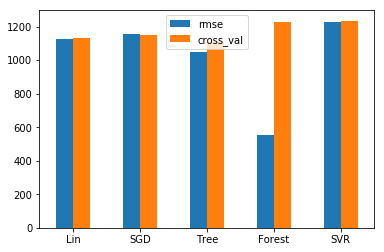

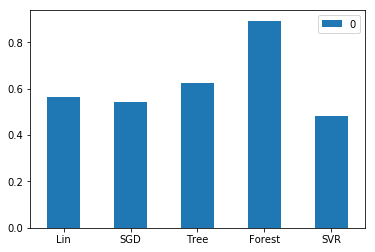

In [68]:
index=['Lin', 'SGD', 'Tree', 'Forest', 'SVR']
df_rmse_crossval = pd.DataFrame({'rmse':rmse_scores, 'cross_val':cross_val_scores}, index=index)
df_r2 = pd.DataFrame(r2_scores, index = index)
df_rmse_crossval.plot.bar(rot=0)
df_r2.plot.bar(rot=0)
plt.show()

We observe that RandomForestRegressor has the lowest RMSE and highest R2 score, but it has significantly higher cross validation score which probably means the model is overfitting the data which is not good.

We choose the DecisionTreeClassifier Model as it has lowest RMSE and cross validation score is almost the same.
This means the model is fitting the data just right.

# Evaluating the Model on Test set

In [69]:
test_predictions = tree_reg.predict(test_final)

In [70]:
item_identifier = test['Item_Identifier']
outlet_identifier = test['Outlet_Identifier']

In [71]:
data= {'Item_Identifier':item_identifier, 'Outlet_Identifier':outlet_identifier, 'Item_Outlet_Sales':test_predictions}
test_predictions_df = pd.DataFrame(data)

In [72]:
test_predictions_df.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1668.684255
1,FDW14,OUT017,1332.249469
2,NCN55,OUT010,576.359462
3,FDQ58,OUT017,2443.644884
4,FDY38,OUT027,6495.245495
5,FDH56,OUT046,2093.410975
6,FDL48,OUT018,732.584354
7,FDC48,OUT027,1950.669163
8,FDN33,OUT045,1668.684255
9,FDA36,OUT017,3134.685985


In [73]:
test_predictions_df.to_csv('submission.csv')